In [2]:
%matplotlib inline
import scanpy as sc
import anndata
import bbknn
import os
from scipy import sparse
import numpy as np
import pandas as pd
sc.settings.verbosity = 3
sc.logging.print_version_and_date()

ModuleNotFoundError: No module named 'bbknn'

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [3]:
adata = sc.read_h5ad('./write/GSE155259_Roy_et_al_raw_counts_norm_log1p_20210918.h5ad')

In [36]:
adata

AnnData object with n_obs × n_vars = 57489 × 33538
    obs: 'sampleID', 'UMI_count', 'detectedGenesPerCell', 'percent_mito', 'donor', 'tissue_type', 'cluster_id', 'cell_type', 'cell_type_id', 'n_counts', 'dpt_pseudotime'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'adata_pseu_location_draw_graph', 'adata_pseu_location_umap', 'cell_type_colors', 'cell_type_id_colors', 'cell_type_id_sizes', 'cluster_id_colors', 'diffmap_evals', 'donor_colors', 'draw_graph', 'hvg', 'iroot', 'markers_s_DEAPLOG', 'markers_s_auto', 'markers_s_power11', 'neighbors', 'paga', 'pca', 'run_PLOGS_time', 'sampleID_colors', 'tissue_type_colors', 'markers_m_DEAPLOG'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_fdg', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [30]:
sc.set_figure_params(dpi=100)

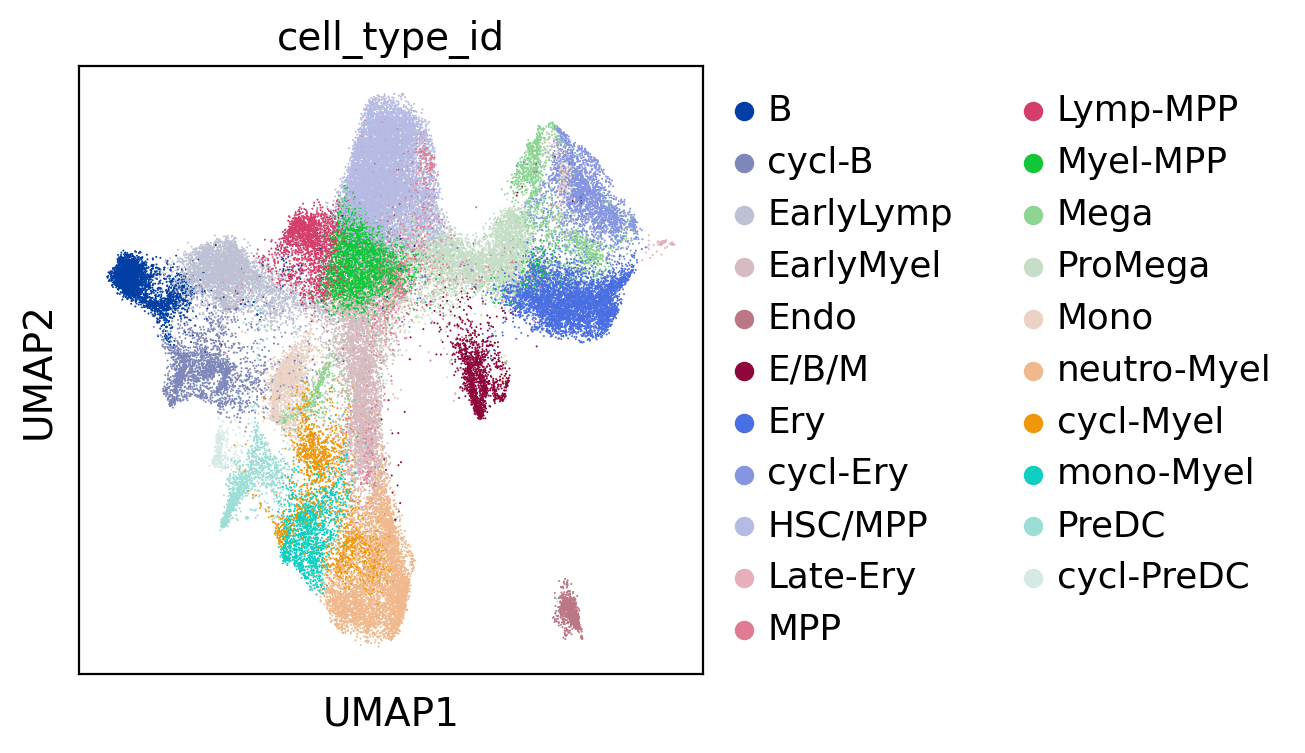

In [32]:
sc.pl.umap(adata,color=['cell_type_id'],cmap='rainbow',groups=[]
           #saave='adata_dpt_pseudotime_20211108.pdf'
          )

# pseudotemporal locating and ordering of genes

before inferring the pseudotemporal locating and ordering of genes, the pseudotime of cells is needed.you can inffering the pseudotime of cells by using `sc.tl.dpt()` (or other tools) as follows:

In [ ]:
#adata.uns["iroot"] = np.flatnonzero(adata.obs["cell_type_id"] == "HSC/MPP")[0] #adata.uns['iroot'] = 29597
#sc.tl.dpt(adata)

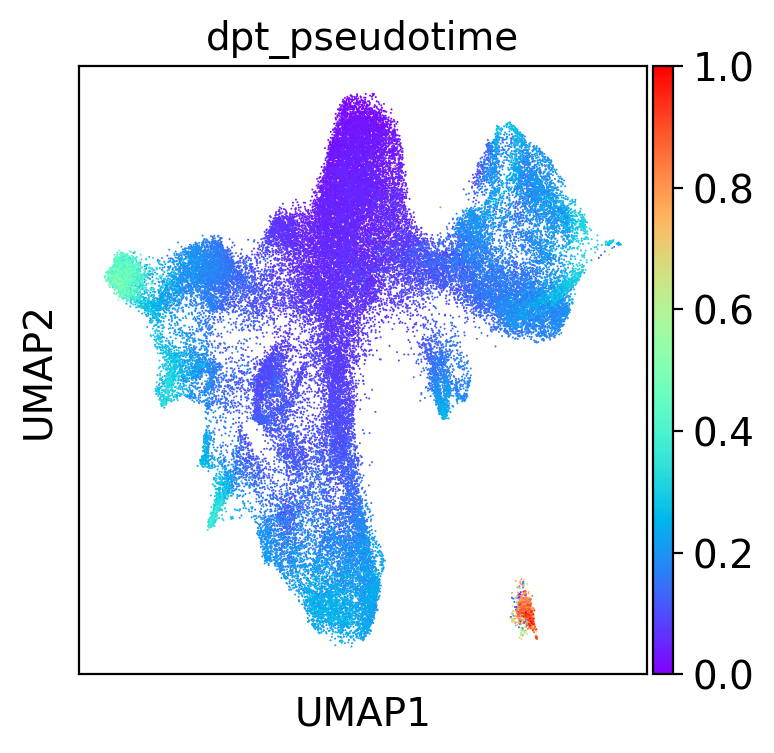

In [34]:
sc.pl.umap(adata,color=['dpt_pseudotime'],cmap='rainbow',groups=[]
           #saave='adata_dpt_pseudotime_20211108.pdf'
          )

## 1. performing differentially expression analysis for cell clusters by deaplog
here `rdata=adata` because the adata just preprocessed by normalization and Logarithetic. 
if adata has been `Feature selection` and other `scale` or `regress_out` preprocess, you should set `rdata = adata.raw.to_adata()`.the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression.

In [41]:
#adata.raw = adata #the AnnData object to the normalized and logarithmized raw gene expression

In [42]:
import deaplog as dpg

In [37]:
markers_m = dpg.deaplog.get_DEG_multi(rdata=adata,adata=adata,group_key='cell_type_id', 
                                   power=11)
adata.uns['markers_m_DEAPLOG'] = markers_m

get the raw data frame...
struct the cell type sets for enrichment analysis...
Fisher_test_for_each_gene...
whole  2000  genes have been done.
whole  3000  genes have been done.
whole  4000  genes have been done.
whole  5000  genes have been done.
whole  6000  genes have been done.
whole  7000  genes have been done.
whole  8000  genes have been done.
whole  11000  genes have been done.
whole  14000  genes have been done.
whole  15000  genes have been done.
whole  16000  genes have been done.
whole  17000  genes have been done.
whole  18000  genes have been done.
whole  21000  genes have been done.
whole  22000  genes have been done.
whole  26000  genes have been done.
whole  28000  genes have been done.
whole  30000  genes have been done.
whole  31000  genes have been done.
whole  33000  genes have been done.
merge differentially expressed genes...
Done!


In [43]:
adata

AnnData object with n_obs × n_vars = 57489 × 33538
    obs: 'sampleID', 'UMI_count', 'detectedGenesPerCell', 'percent_mito', 'donor', 'tissue_type', 'cluster_id', 'cell_type', 'cell_type_id', 'n_counts', 'dpt_pseudotime'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'adata_pseu_location_draw_graph', 'adata_pseu_location_umap', 'cell_type_colors', 'cell_type_id_colors', 'cell_type_id_sizes', 'cluster_id_colors', 'diffmap_evals', 'donor_colors', 'draw_graph', 'hvg', 'iroot', 'markers_s_DEAPLOG', 'markers_s_auto', 'markers_s_power11', 'neighbors', 'paga', 'pca', 'run_PLOGS_time', 'sampleID_colors', 'tissue_type_colors', 'markers_m_DEAPLOG'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_fdg', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

## 2. performing the peudotemporal locating and ordering of all genes by deaplog
performing the peudotemporal locating and ordering of all genes based on `umap`,set `obsm='X_umap'`;
performing the peudotemporal locating and ordering of all genes based on `tsne`,set `obsm='X_tsne'`;
performing the peudotemporal locating and ordering of all genes based on `draw_graph`,set `obsm='X_draw_graph_fa'`

In [44]:
adata_pseu_location_umap = dpg.deaplog.get_genes_location_pseudotime(rdata=adata,
                                                                        adata=adata,
                                                                        group_key='cell_type_id',
                                                                        gene_matrix='markers_m_DEAPLOG',
                                                                        obsm='X_umap',
                                                                        power=11
                                                                 )
# also you can 

whole  2000  genes have been done.
whole  3000  genes have been done.
whole  4000  genes have been done.
whole  5000  genes have been done.
whole  6000  genes have been done.
whole  7000  genes have been done.
whole  8000  genes have been done.
whole  11000  genes have been done.
whole  14000  genes have been done.
whole  15000  genes have been done.
whole  16000  genes have been done.
whole  17000  genes have been done.
whole  18000  genes have been done.
whole  21000  genes have been done.
whole  22000  genes have been done.
whole  26000  genes have been done.
whole  28000  genes have been done.
whole  30000  genes have been done.
whole  31000  genes have been done.
whole  33000  genes have been done.
Running time : 0:12:22.534463 Seconds
Done!


In [45]:
adata_pseu_location_umap

gene_name  x_location  y_location  dpt_pseudotime  cell_type  \
0      AL627309.1   -6.024096    1.583010        0.132071         NS   
1      AL669831.5   -5.146938    0.787654        0.107869         NS   
2          FAM87B   -1.167869   -6.169816        0.198751         NS   
3       LINC00115    0.808134    3.739336        0.021740    HSC/MPP   
4          FAM41C    0.460128    4.415659        0.020564    HSC/MPP   
...           ...         ...         ...             ...        ...   
23330  AC007325.4    0.156824    3.187924        0.019686    HSC/MPP   
23331  AL354822.1   -5.312247    1.210993        0.145543  EarlyLymp   
23332  AC004556.1    3.447702    1.290130        0.142018         NS   
23333  AC233755.2    0.150461   -5.151040        0.163604         NS   
23334  AC240274.1    0.228413    3.506762        0.021207    HSC/MPP   

          ratio       q_value  mean_exValue  
0      0.000000  1.000000e+00      0.000000  
1      0.000000  1.000000e+00      0.000000  
2      0.000000  1.000000e+00      0.000000  
3      0.307692  3.750032e-07      1.150505  
4      0.238806  4.428403e-02      1.039318  
...         ...           ...           ...  
23330  0.336538  5.153130e-08      0.960510  
23331  0.228571  3.473262e-04      1.060447  
23332  0.000000  1.000000e+00      0.000000  
23333  0.000000  1.000000e+00      0.000000  
23334  0.335244  1.129796e-12      1.105508  

[23335 rows x 8 columns]

In [46]:
q_value = list(-np.log10(adata_pseu_location_umap['q_value']))
for i in range(len(q_value)):
    if q_value[i]==np.inf:
        q_value[i] = 500

/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


Text(0.5, 1.0, 'adata_genes_based_UMAP')

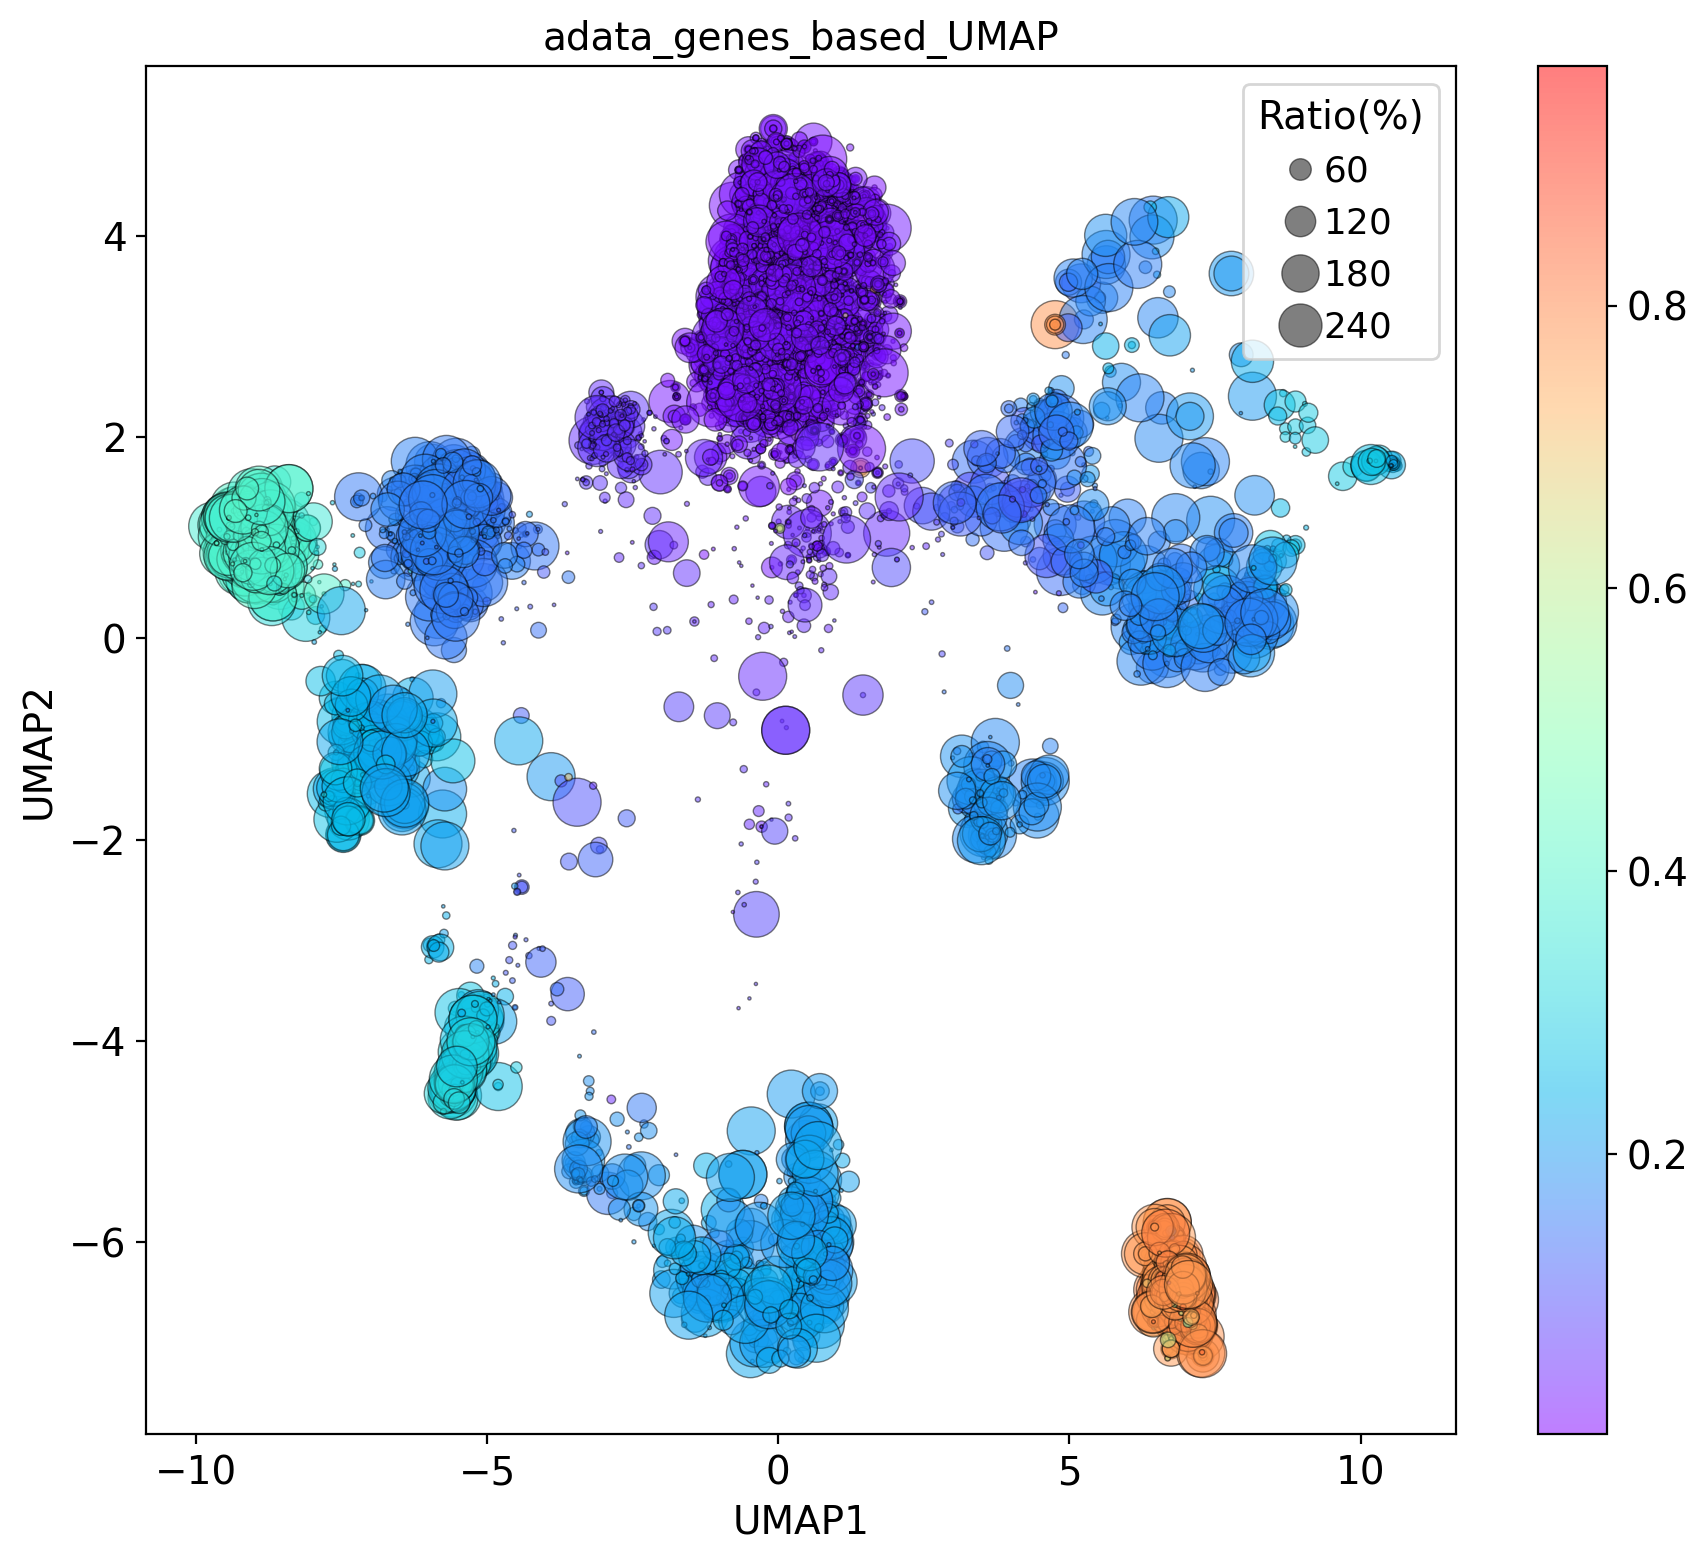

In [49]:
plt.figure(figsize=(10.5,9))
gene_map = plt.scatter(x=adata_pseu_location_umap['x_location'],
                       y=adata_pseu_location_umap['y_location'],
                        marker='o',
                       s = q_value,
                        #s=list(adata_pseu_location_draw_graph['q_value']*100),#cmap=mycmap3,
                        linewidths=0.5,alpha=0.5,
                        edgecolors='black',
                        cmap='rainbow',
                      # c='yellow',
                        c=adata_pseu_location_umap['dpt_pseudotime']
                      )
"""
#for gene in ['MYOD1']:
for gene in adata_skm_pseu_location_draw_graph_tf_R50['gene_name']:
    df_gene = adata_skm_pseu_location_draw_graph_tf_R50.loc[adata_skm_pseu_location_draw_graph_tf_R50['gene_name']==gene,]
    if df_gene.shape[0]>1:
        for i in range(df_gene.shape[0]):
            plt.annotate(gene,xy=(df_gene.iloc[i,1],df_gene.iloc[i,2]),fontsize=4)
    else:
        plt.annotate(gene,xy=(df_gene.iloc[0,1],df_gene.iloc[0,2]),fontsize=4)
"""

plt.colorbar()
handles, labels = gene_map.legend_elements(prop='sizes',alpha=0.5,num=5)
plt.legend(handles,labels,loc="upper right",title='Ratio(%)')
plt.grid(b=False)
plt.xlabel(xlabel='UMAP1')
plt.ylabel(ylabel='UMAP2')
plt.title(label='adata_genes_based_UMAP')
#plt.savefig('./figures/adata_TFs_based_phate_nodes_pseudotime_20210918.pdf')

#### you can also filter the results. For example, filtering the results by `q_value` and `ratio`:

In [54]:
adata_pseu_location_umap_filtered = adata_pseu_location_umap.loc[adata_pseu_location_umap['q_value']<=1e-30,
                                                    ].loc[adata_pseu_location_umap['ratio']>=0.25,
                                                          ].sort_values(by='q_value')

In [55]:
adata_pseu_location_umap_filtered

gene_name  x_location  y_location  dpt_pseudotime  cell_type     ratio  \
22568     IGLL1   -9.356315    1.195762        0.380086          B  0.261547   
22570     IGLL1   -5.538907    0.211670        0.155673  EarlyLymp  0.343536   
7257   HIST1H4C    8.143143    2.407291        0.198452   cycl-Ery  0.298272   
7375      HLA-E    0.216369    2.504166        0.016581    HSC/MPP  0.364982   
20950     UHRF1   -6.612813   -0.703284        0.201308     cycl-B  0.264481   
...         ...         ...         ...             ...        ...       ...   
10781    TMEM65    0.995534    3.373331        0.021734    HSC/MPP  0.313599   
8751        ZP3   -0.874993    2.944716        0.024841    HSC/MPP  0.361669   
11873    EPS8L2    0.240479    2.250201        0.021659    HSC/MPP  0.462046   
2732      PEX13   -0.034381    2.289166        0.023941    HSC/MPP  0.297216   
19172     ACBD4    0.809091    4.394773        0.022059    HSC/MPP  0.437853   

             q_value  mean_exValue  
22568  8.000000e-300      3.691867  
22570  8.000000e-300      3.691867  
7257   8.000000e-300      3.932414  
7375   8.000000e-300      2.342090  
20950  1.150000e-299      2.113970  
...              ...           ...  
10781   7.750442e-31      1.117053  
8751    9.003950e-31      1.001920  
11873   9.423413e-31      1.060740  
2732    9.729453e-31      1.173397  
19172   9.814123e-31      1.053809  

[2113 rows x 8 columns]

In [56]:
q_value = list(-np.log10(adata_pseu_location_umap_filtered['q_value']))
for i in range(len(q_value)):
    if q_value[i]==np.inf:
        q_value[i] = 500

/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


Text(0.5, 1.0, 'adata_genes_based_UMAP')

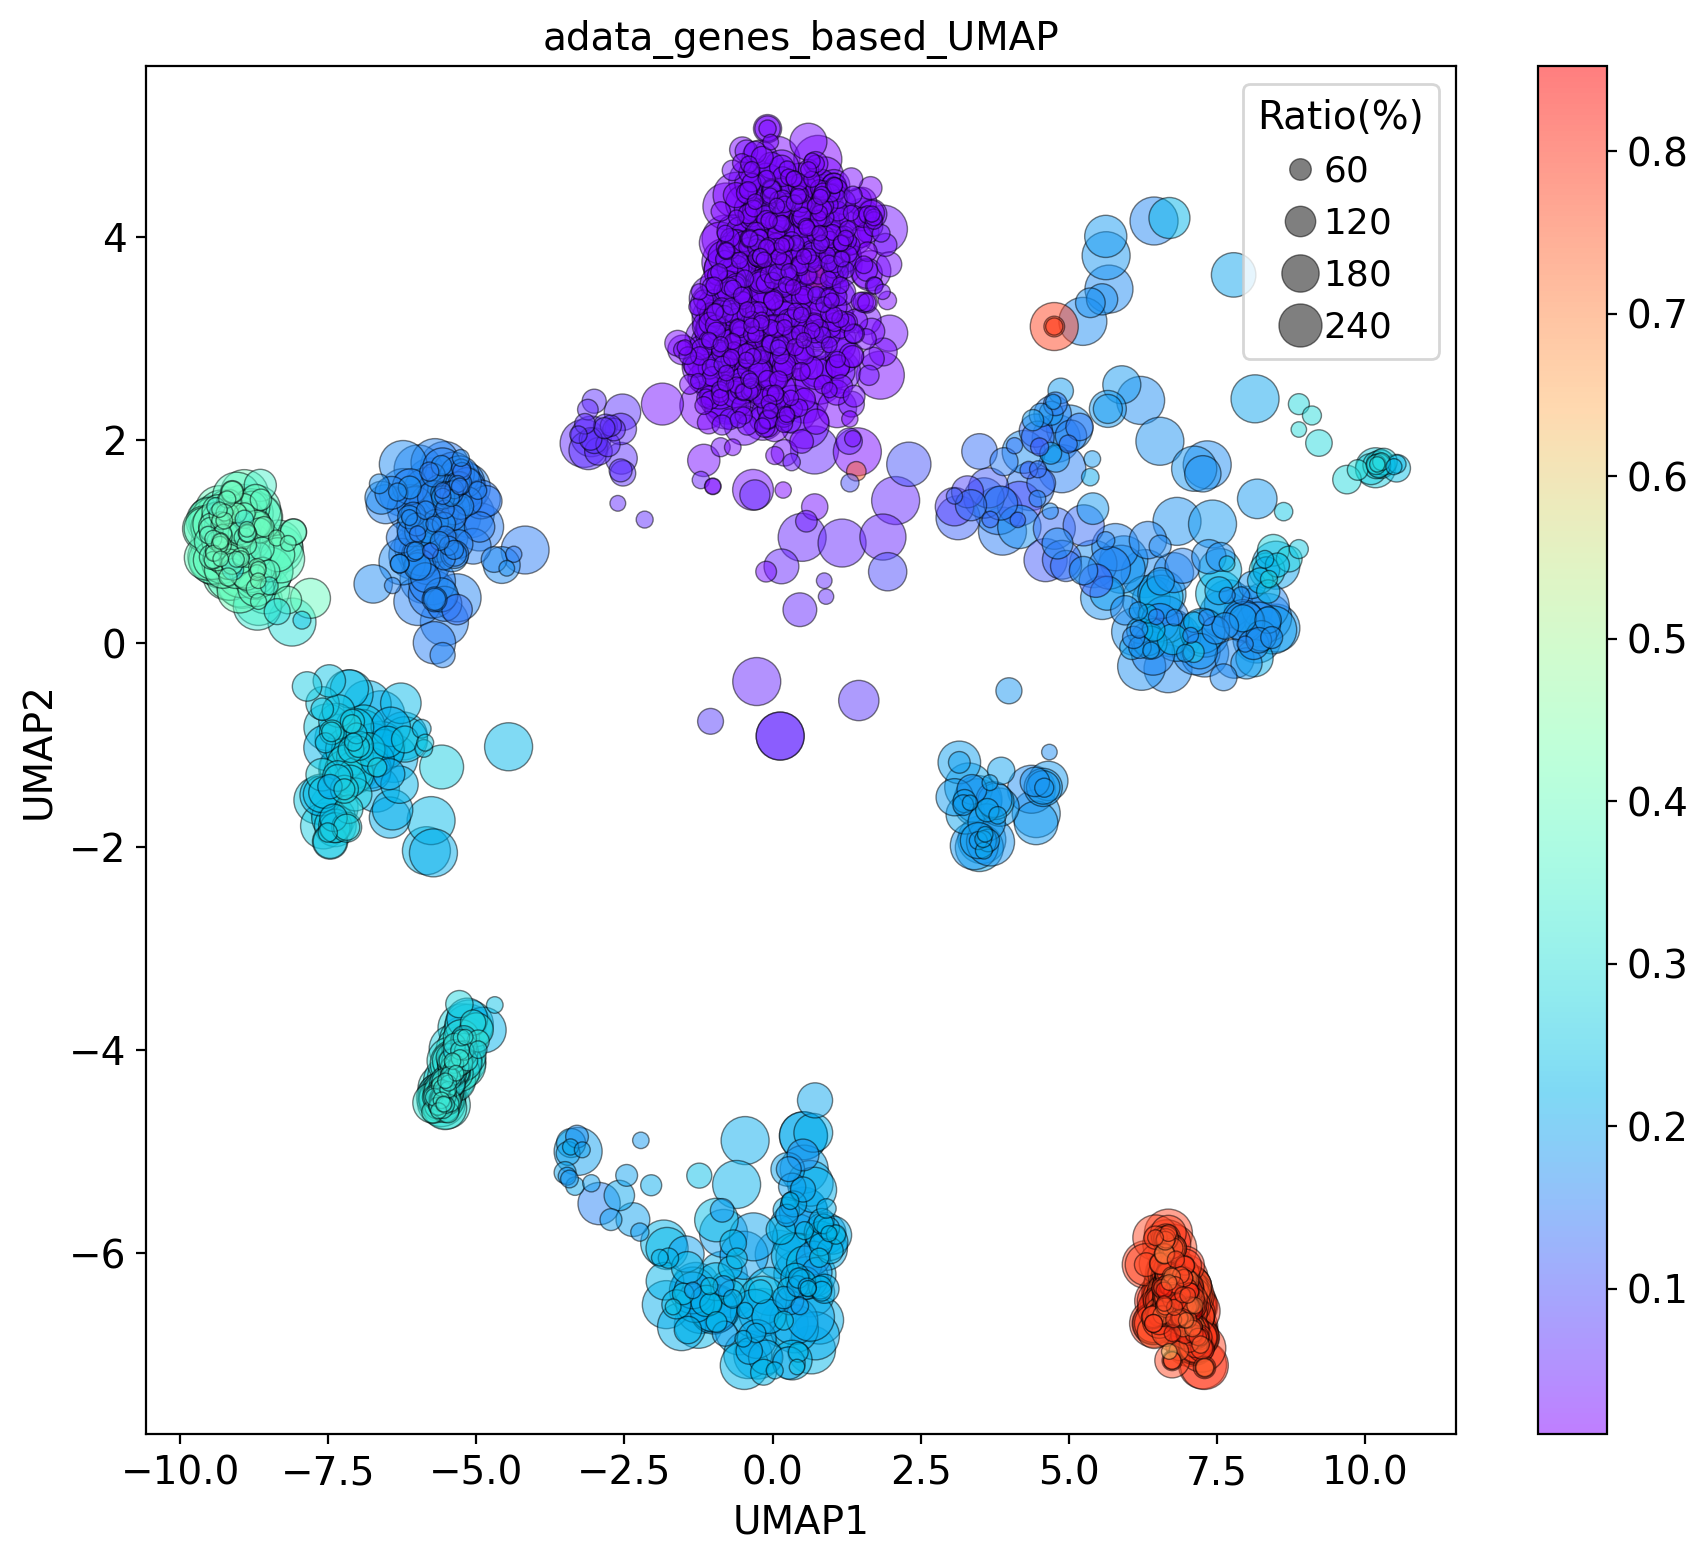

In [57]:
plt.figure(figsize=(10.5,9))
gene_map = plt.scatter(x=adata_pseu_location_umap_filtered['x_location'],
                       y=adata_pseu_location_umap_filtered['y_location'],
                        marker='o',
                       s = q_value,
                        #s=list(adata_pseu_location_draw_graph['q_value']*100),#cmap=mycmap3,
                        linewidths=0.5,alpha=0.5,
                        edgecolors='black',
                        cmap='rainbow',
                      # c='yellow',
                        c=adata_pseu_location_umap_filtered['dpt_pseudotime']
                      )
"""
#for gene in ['MYOD1']:
for gene in adata_skm_pseu_location_draw_graph_tf_R50['gene_name']:
    df_gene = adata_skm_pseu_location_draw_graph_tf_R50.loc[adata_skm_pseu_location_draw_graph_tf_R50['gene_name']==gene,]
    if df_gene.shape[0]>1:
        for i in range(df_gene.shape[0]):
            plt.annotate(gene,xy=(df_gene.iloc[i,1],df_gene.iloc[i,2]),fontsize=4)
    else:
        plt.annotate(gene,xy=(df_gene.iloc[0,1],df_gene.iloc[0,2]),fontsize=4)
"""

plt.colorbar()
handles, labels = gene_map.legend_elements(prop='sizes',alpha=0.5,num=5)
plt.legend(handles,labels,loc="upper right",title='Ratio(%)')
plt.grid(b=False)
plt.xlabel(xlabel='UMAP1')
plt.ylabel(ylabel='UMAP2')
plt.title(label='adata_genes_based_UMAP')
#plt.savefig('./figures/adata_TFs_based_phate_nodes_pseudotime_20210918.pdf')

## 3. or you can just selected the peudotemporal locating and ordering of the transcript factors

In [50]:
TFs = pd.read_csv('/data/zhangbao/work/combined_TFs.csv')

In [52]:
TFs

TS_genes
0      ZBTB8B
1        GSX2
2        TBX2
3        PAX8
4     CREB3L1
...       ...
4063    USP28
4064     TLR2
4065     TLR3
4066  TNFRSF8
4067    UBXN7

[4068 rows x 1 columns]

In [95]:
markers_m_TFs = adata_pseu_location_umap_filtered.loc[adata_pseu_location_umap_filtered['gene_name'].isin(TFs.TS_genes),]

In [96]:
markers_m_TFs

gene_name  x_location  y_location  dpt_pseudotime  cell_type     ratio  \
20950     UHRF1   -6.612813   -0.703284        0.201308     cycl-B  0.264481   
11156    ZCCHC7   -5.882074    0.629324        0.164802  EarlyLymp  0.499292   
11155    ZCCHC7   -9.033917    1.156636        0.380827          B  0.261854   
669        YBX1    6.720791    0.104438        0.169790        Ery  0.266256   
5242      CYTL1   -0.180884    3.345785        0.029214    HSC/MPP  0.387260   
...         ...         ...         ...             ...        ...       ...   
18032    ZDHHC1    0.794749    4.037128        0.021960    HSC/MPP  0.390196   
21754   SERTAD3   -0.292523    4.348264        0.021277    HSC/MPP  0.305833   
9917    SMARCA1   -1.256300    2.581041        0.027723    HSC/MPP  0.338690   
10679     NCALD    6.611440   -6.499539        0.784897       Endo  0.290909   
3930      CAMK1    4.737702    2.377580        0.186530    ProMega  0.297546   

             q_value  mean_exValue  
20950  1.150000e-299      2.113970  
11156  1.150000e-299      2.067482  
11155  1.150000e-299      2.067482  
669    1.150000e-299      3.320586  
5242   1.150000e-299      2.267417  
...              ...           ...  
18032   4.112434e-31      1.586536  
21754   4.339106e-31      1.260972  
9917    6.078142e-31      1.206379  
10679   6.881767e-31      1.266650  
3930    7.568920e-31      1.171627  

[364 rows x 8 columns]

In [97]:
adata_TFs  = adata[:,adata.var_names.isin(markers_m_TFs.gene_name)]

In [98]:
adata_TFs

View of AnnData object with n_obs × n_vars = 57489 × 351
    obs: 'sampleID', 'UMI_count', 'detectedGenesPerCell', 'percent_mito', 'donor', 'tissue_type', 'cluster_id', 'cell_type', 'cell_type_id', 'n_counts', 'dpt_pseudotime'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'adata_pseu_location_draw_graph', 'adata_pseu_location_umap', 'cell_type_colors', 'cell_type_id_colors', 'cell_type_id_sizes', 'cluster_id_colors', 'diffmap_evals', 'donor_colors', 'draw_graph', 'hvg', 'iroot', 'markers_s_DEAPLOG', 'markers_s_auto', 'markers_s_power11', 'neighbors', 'paga', 'pca', 'run_PLOGS_time', 'sampleID_colors', 'tissue_type_colors', 'markers_m_DEAPLOG'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_fdg', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

In [143]:
adata_TFS_pseu_location_umap = dpg.deaplog.get_genes_location_pseudotime(rdata=adata_TFs,
                                                                        adata=adata,
                                                                        group_key='cell_type_id',
                                                                        gene_matrix='markers_m_DEAPLOG',
                                                                        obsm='X_umap',
                                                                        power=11
                                                                 )

Running time : 0:00:17.555281 Seconds
Done!


In [144]:
adata_TFS_pseu_location_umap

gene_name  x_location  y_location  dpt_pseudotime cell_type     ratio  \
0         SKI    1.303507    2.209089        0.015066   HSC/MPP  0.387372   
1      PRDM16    1.158131    3.939501        0.020863   HSC/MPP  0.646154   
2        NBL1   -0.018353    4.147895        0.014843   HSC/MPP  0.575037   
3        E2F2   -8.361394    0.312660        0.293893         B  0.327309   
4        E2F2   -7.213561   -1.174969        0.269361    cycl-B  0.419679   
..        ...         ...         ...             ...       ...       ...   
411     HMOX1    6.951490   -6.453536        0.782380      Endo  0.716981   
412      H1F0    1.079926    2.469372        0.019001   HSC/MPP  0.304523   
413      MAFF    0.371124    4.003730        0.016321   HSC/MPP  0.513095   
414     NRIP1    1.430628    1.885855        0.021817   HSC/MPP  0.469617   
415      AIRE   -9.192488    0.653130        0.399005         B  0.902439   

           q_value  mean_exValue  
0     5.781865e-35      1.175269  
1     4.424868e-32      1.138638  
2    2.778693e-124      1.242902  
3     2.854543e-88      1.416342  
4    2.122014e-163      1.416342  
..             ...           ...  
411   1.721578e-56      1.637554  
412   1.116769e-82      1.780162  
413  2.978424e-265      1.689178  
414  2.200000e-299      1.879308  
415   2.477631e-43      2.154292  

[416 rows x 8 columns]

In [145]:
q_value = list(-np.log10(adata_TFS_pseu_location_umap['q_value']))
for i in range(len(q_value)):
    if q_value[i]==np.inf:
        q_value[i] = 500

/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


Text(0.5, 1.0, 'adata_genes_based_UMAP')

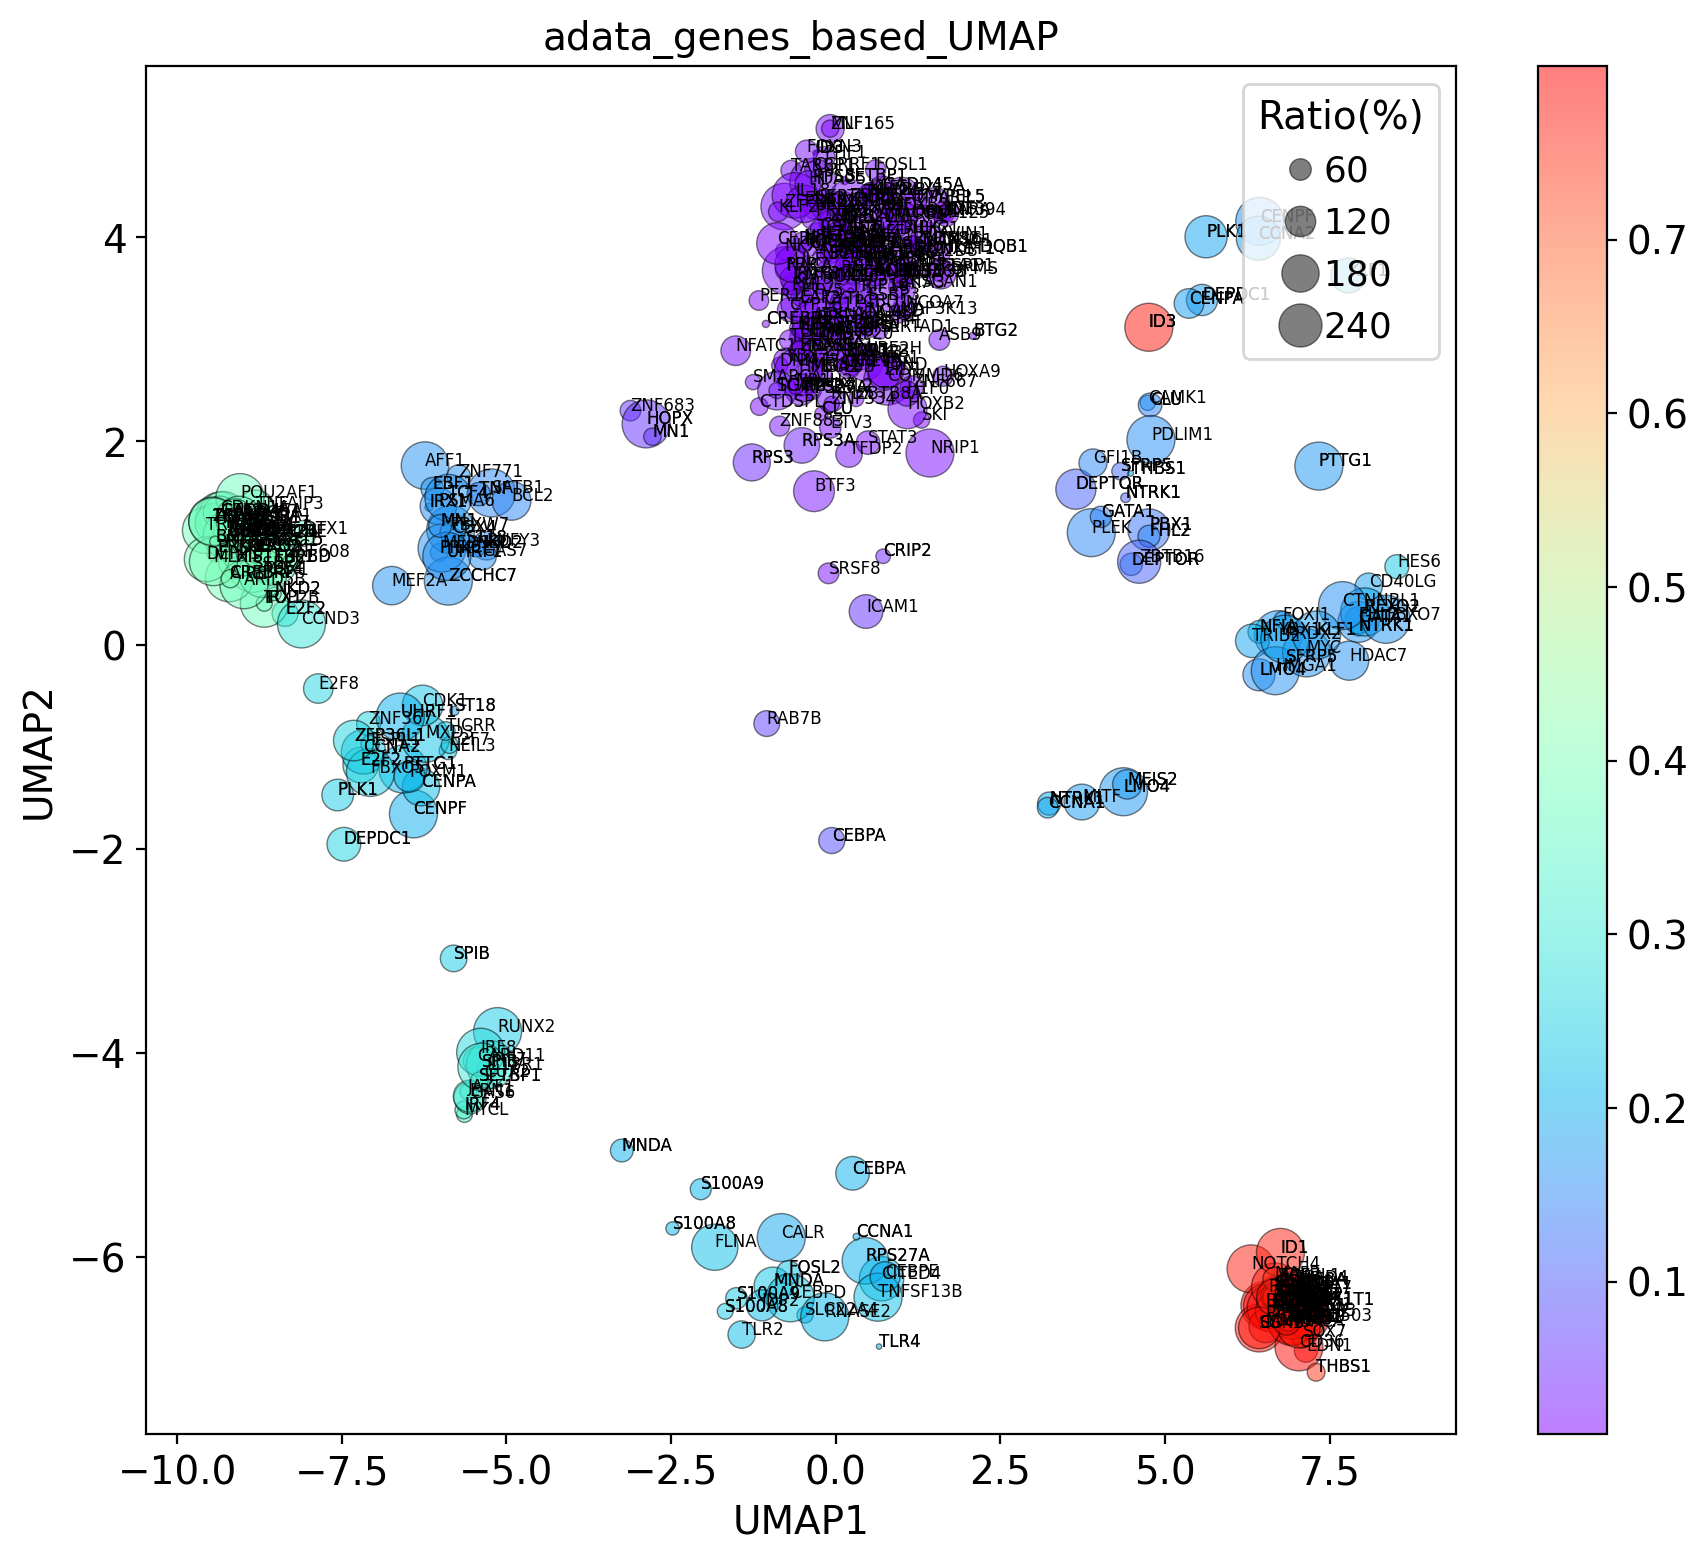

In [146]:
plt.figure(figsize=(10.5,9))
gene_map = plt.scatter(x=adata_TFS_pseu_location_umap['x_location'],
                       y=adata_TFS_pseu_location_umap['y_location'],
                        marker='o',
                       s = q_value,
                        #s=list(adata_pseu_location_draw_graph['q_value']*100),#cmap=mycmap3,
                        linewidths=0.5,alpha=0.5,
                        edgecolors='black',
                        cmap='rainbow',
                      # c='yellow',
                        c=adata_TFS_pseu_location_umap['dpt_pseudotime']
                      )
#"""
#for gene in ['UHRF1']:
for gene in adata_TFS_pseu_location_umap['gene_name']:
    df_gene = adata_TFS_pseu_location_umap.loc[adata_TFS_pseu_location_umap['gene_name']==gene,]
    if df_gene.shape[0]>1:
        for i in range(df_gene.shape[0]):
            plt.annotate(gene,xy=(df_gene.iloc[i,1],df_gene.iloc[i,2]),fontsize=6)
    else:
        plt.annotate(gene,xy=(df_gene.iloc[0,1],df_gene.iloc[0,2]),fontsize=6)
#"""

plt.colorbar()
handles, labels = gene_map.legend_elements(prop='sizes',alpha=0.5,num=5)
plt.legend(handles,labels,loc="upper right",title='Ratio(%)')
plt.grid(b=False)
plt.xlabel(xlabel='UMAP1')
plt.ylabel(ylabel='UMAP2')
plt.title(label='adata_genes_based_UMAP')
#plt.savefig('./figures/adata_TFs_based_phate_nodes_pseudotime_20210918.pdf')

# B cell lineage 

In [147]:
adata_Bcell = adata[adata.obs['cell_type_id'].isin(['HSC/MPP','Lymp-MPP','EarlyLymp','B']),]

In [148]:
from pandas.api.types import CategoricalDtype
cat_dtype = CategoricalDtype(categories=['HSC/MPP','Lymp-MPP','EarlyLymp','B'], ordered=True)
adata_Bcell.obs['cell_type_id'] = adata_Bcell.obs['cell_type_id'].astype(cat_dtype)

/home/bobby/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  This is separate from the ipykernel package so we can avoid doing imports until


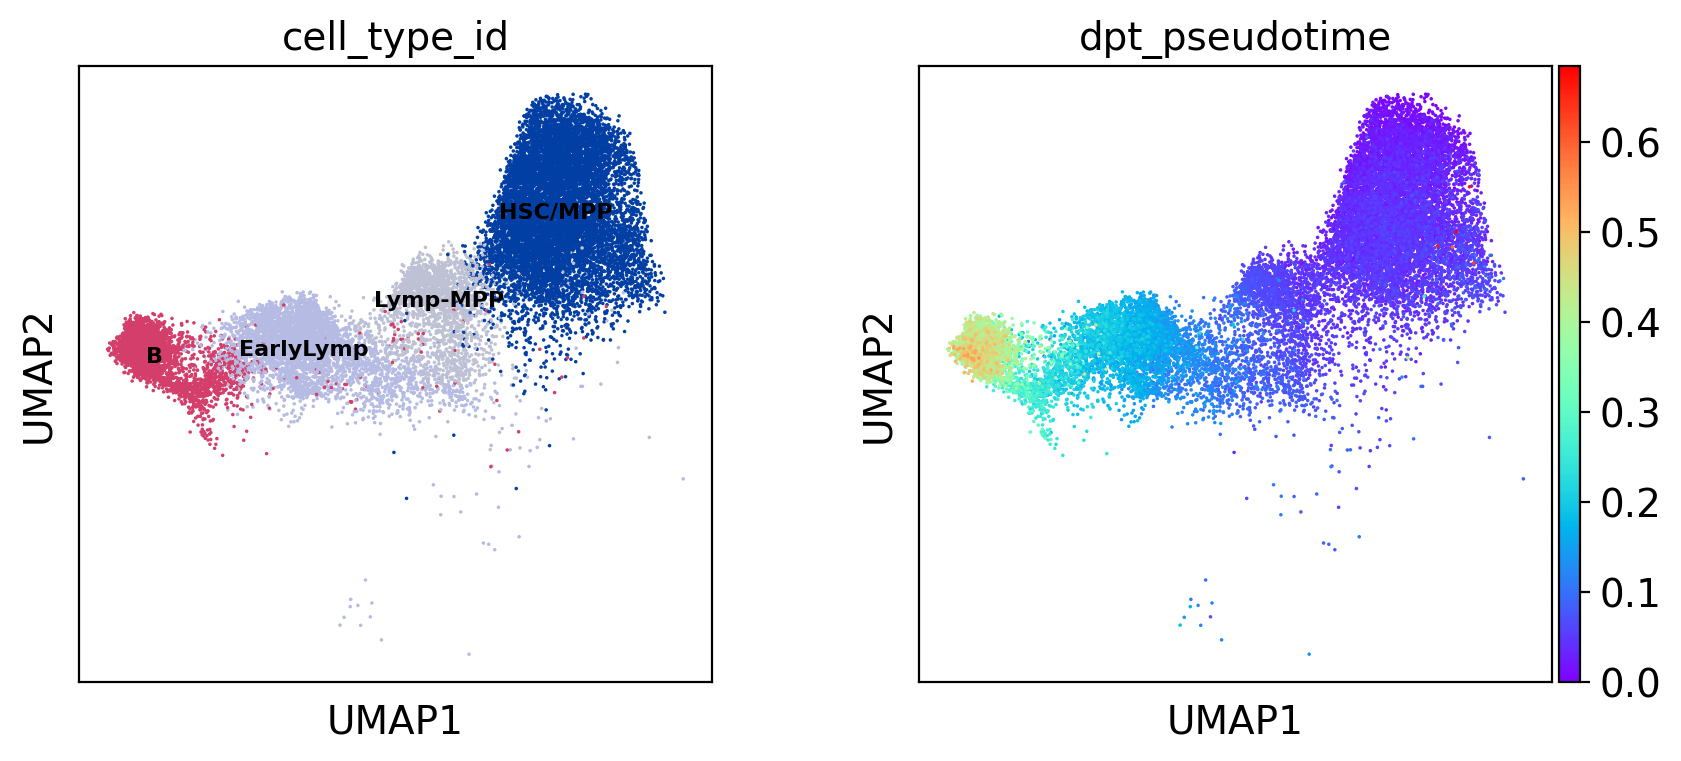

In [149]:
sc.pl.umap(adata_Bcell,color=['cell_type_id','dpt_pseudotime'],
           legend_loc='on data',legend_fontsize=8,cmap='rainbow',
          )

In [150]:
adata_TFS_pseu_location_umap_Bcell = adata_TFS_pseu_location_umap.loc[adata_TFS_pseu_location_umap['cell_type'].isin(['HSC/MPP','Lymp-MPP','EarlyLymp','B']),]
adata_TFS_pseu_location_umap_Bcell = adata_TFS_pseu_location_umap_Bcell.sort_values(by=['dpt_pseudotime','q_value'],ascending=[True,True])

In [151]:
adata_TFS_pseu_location_umap_Bcell

gene_name  x_location  y_location  dpt_pseudotime cell_type     ratio  \
55      FOSL2   -0.467263    3.915869        0.011989   HSC/MPP  0.277886   
376     CEBPB   -0.884605    3.941262        0.012593   HSC/MPP  0.441597   
146  HLA-DQB1    1.599801    3.855811        0.012671   HSC/MPP  0.294145   
198       CLU   -0.217279    2.272887        0.012794   HSC/MPP  0.295761   
224      KLF9   -0.640251    3.545536        0.013604   HSC/MPP  0.408228   
..        ...         ...         ...             ...       ...       ...   
415      AIRE   -9.192488    0.653130        0.399005         B  0.902439   
157     BACH2   -9.156788    1.028394        0.399188         B  0.800712   
145  HLA-DQB1   -9.433109    1.200399        0.399598         B  0.226301   
237      RAG1   -9.238498    1.080007        0.405388         B  0.884712   
11      RIMS3   -9.285736    0.966504        0.410300         B  0.944444   

           q_value  mean_exValue  
55    1.298917e-17      1.398925  
376  1.599566e-225      1.603761  
146   5.296995e-50      1.820714  
198   1.541098e-23      1.434280  
224   2.122767e-67      1.292703  
..             ...           ...  
415   2.477631e-43      2.154292  
157  3.301942e-241      1.881189  
145  6.526011e-197      1.820714  
237  2.200000e-299      2.107858  
11    1.578389e-41      1.724776  

[251 rows x 8 columns]

In [167]:
adata_Bcell_degs_df = adata_Bcell[:,adata_Bcell.var_names.isin(adata_TFS_pseu_location_umap_Bcell.gene_name)].to_df()

In [168]:
adata_Bcell_degs_df = adata_Bcell_degs_df.reindex(columns=list(pd.unique(adata_TFS_pseu_location_umap_Bcell.gene_name)))

In [169]:
adata_Bcell_degs_df

FOSL2     CEBPB  HLA-DQB1       CLU      KLF9  \
AAACCTGAGTGTACGG-1_eFL       0.000000  0.444347  0.000000  0.000000  0.000000   
AAACCTGCATGAACCT-1_eFL       0.000000  0.000000  0.472689  0.000000  0.000000   
AAACCTGTCCAGTATG-1_eFL       0.000000  0.000000  0.000000  0.000000  0.000000   
AAACGGGAGATCTGAA-1_eFL       0.000000  0.000000  0.000000  0.000000  0.000000   
AAACGGGAGCCTATGT-1_eFL       0.000000  0.000000  0.000000  0.000000  0.000000   
...                               ...       ...       ...       ...       ...   
TTTGGTTTCTCGTGAA-1_Adult_BM  0.000000  0.000000  0.000000  0.000000  0.000000   
TTTGGTTTCTGCCTCA-1_Adult_BM  0.703248  2.215112  0.000000  0.703248  0.703248   
TTTGTTGCACATAGCT-1_Adult_BM  0.647147  2.478302  3.128601  0.647147  0.000000   
TTTGTTGGTCTTTATC-1_Adult_BM  0.000000  1.194456  0.000000  0.000000  0.000000   
TTTGTTGTCCAGCTCT-1_Adult_BM  0.000000  0.925769  1.189584  0.566395  1.189584   

                                 YBX3      JUND    RNF125  ID3      NBL1  ...  \
AAACCTGAGTGTACGG-1_eFL       1.174921  0.444347  0.000000  0.0  0.000000  ...   
AAACCTGCATGAACCT-1_eFL       1.228824  0.000000  0.000000  0.0  0.000000  ...   
AAACCTGTCCAGTATG-1_eFL       0.000000  0.000000  0.000000  0.0  0.000000  ...   
AAACGGGAGATCTGAA-1_eFL       1.401523  1.401523  0.000000  0.0  0.000000  ...   
AAACGGGAGCCTATGT-1_eFL       0.821561  0.492880  0.000000  0.0  0.000000  ...   
...                               ...       ...       ...  ...       ...  ...   
TTTGGTTTCTCGTGAA-1_Adult_BM  0.000000  3.906561  0.000000  0.0  0.000000  ...   
TTTGGTTTCTGCCTCA-1_Adult_BM  2.215112  3.386710  1.625551  0.0  0.000000  ...   
TTTGTTGCACATAGCT-1_Adult_BM  2.312618  3.128601  0.647147  0.0  0.000000  ...   
TTTGTTGGTCTTTATC-1_Adult_BM  1.493497  2.067531  0.765877  0.0  0.000000  ...   
TTTGTTGTCCAGCTCT-1_Adult_BM  2.153975  2.787360  1.570598  0.0  0.566395  ...   

                                DEPP1     MLXIP  BMP2  MSX1     NLRC5  \
AAACCTGAGTGTACGG-1_eFL       0.000000  0.444347   0.0   0.0  0.000000   
AAACCTGCATGAACCT-1_eFL       0.000000  0.792361   0.0   0.0  0.000000   
AAACCTGTCCAGTATG-1_eFL       0.000000  0.491792   0.0   0.0  0.000000   
AAACGGGAGATCTGAA-1_eFL       0.000000  0.000000   0.0   0.0  0.000000   
AAACGGGAGCCTATGT-1_eFL       0.000000  0.000000   0.0   0.0  0.000000   
...                               ...       ...   ...   ...       ...   
TTTGGTTTCTCGTGAA-1_Adult_BM  0.000000  0.000000   0.0   0.0  0.000000   
TTTGGTTTCTGCCTCA-1_Adult_BM  0.000000  1.401408   0.0   0.0  0.000000   
TTTGTTGCACATAGCT-1_Adult_BM  1.036796  0.000000   0.0   0.0  1.036796   
TTTGTTGGTCTTTATC-1_Adult_BM  0.000000  0.765877   0.0   0.0  0.000000   
TTTGTTGTCCAGCTCT-1_Adult_BM  0.000000  0.000000   0.0   0.0  0.000000   

                                FOXO1  AIRE  BACH2  RAG1  RIMS3  
AAACCTGAGTGTACGG-1_eFL       0.000000   0.0    0.0   0.0    0.0  
AAACCTGCATGAACCT-1_eFL       0.000000   0.0    0.0   0.0    0.0  
AAACCTGTCCAGTATG-1_eFL       0.000000   0.0    0.0   0.0    0.0  
AAACGGGAGATCTGAA-1_eFL       0.000000   0.0    0.0   0.0    0.0  
AAACGGGAGCCTATGT-1_eFL       0.000000   0.0    0.0   0.0    0.0  
...                               ...   ...    ...   ...    ...  
TTTGGTTTCTCGTGAA-1_Adult_BM  0.000000   0.0    0.0   0.0    0.0  
TTTGGTTTCTGCCTCA-1_Adult_BM  0.000000   0.0    0.0   0.0    0.0  
TTTGTTGCACATAGCT-1_Adult_BM  0.000000   0.0    0.0   0.0    0.0  
TTTGTTGGTCTTTATC-1_Adult_BM  0.000000   0.0    0.0   0.0    0.0  
TTTGTTGTCCAGCTCT-1_Adult_BM  0.925769   0.0    0.0   0.0    0.0  

[18479 rows x 234 columns]

In [170]:
adata_Bcell_degs_df['cell_type_id'] = adata_Bcell.obs['cell_type_id']
adata_Bcell_degs_df = adata_Bcell_degs_df.sort_values(by='cell_type_id')
cluster_names=adata_Bcell_degs_df.pop('cell_type_id')
louvain_tag = adata.obs['cell_type_id'].cat.categories
louvain_lut1=dict(zip(louvain_tag,adata.uns['cell_type_id_colors']))
louvain_col_colors=cluster_names.map(louvain_lut1)

In [171]:
adata_Bcell_degs_df_rolling = adata_Bcell_degs_df.rolling(window=924,min_periods=1,win_type='hamming',axis=0,).mean()

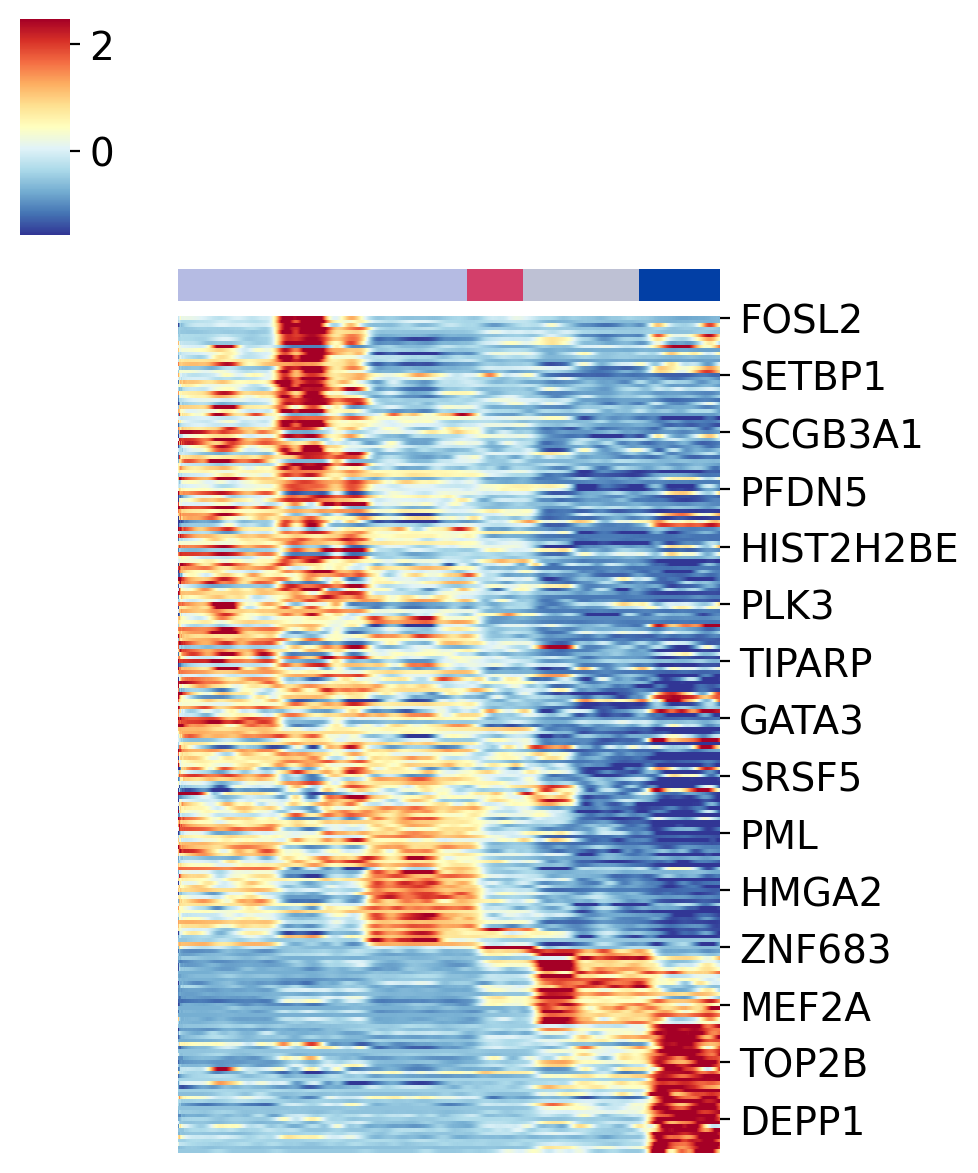

In [172]:
sgBCell = sns.clustermap(adata_Bcell_degs_df_rolling.transpose(),
               #metric="correlation",
                         cmap='RdYlBu_r',
                         row_cluster=False,
                         col_cluster=False,
                         robust=True,
                         xticklabels=False,
                         #yticklabels=False,
                         figsize=(5,6),
                         z_score=0,
                         #standard_scale=0,
                         col_colors=[louvain_col_colors],
                         #row_colors=[gene_R_row_colors]
              )